In [1]:
import numpy as np
import pandas as pd
import os

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from scipy.special import rel_entr
from scipy.stats import entropy
import scipy.stats
import math
import warnings 
warnings.filterwarnings("ignore") 

In [2]:
# 使用GPU
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [3]:
! nvidia-smi

Tue Aug  2 16:26:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.129.06   Driver Version: 470.129.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 73%   83C    P2   166W / 260W |   5339MiB / 11019MiB |     97%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 33%   

# MongoDB

In [4]:
from pymongo import MongoClient
import pymongo

In [5]:
mongoURI = "mongodb://%s:%s@%s/%s?authMechanism=SCRAM-SHA-1" % ("eva", "eva_30241", "140.117.69.70:30241", "eva")

try:
    conn = pymongo.MongoClient(mongoURI)
    db = conn.eva
    # db_rm_de = db.rm_patent_de
    # db_rm_de = db.rm_patent_de
    # db_rm_de = db.rm_patent_de
    
    # db_rm_de_2019 = db.rm_patent_de_2019
    # db_rm_de_2019 = db.rm_patent_de_2019
    db_rm_de_2019 = db.rm_patent_de_2019
except errors.ConnectionFailure as err:
    print(err)

# 2019

## Company數量

In [6]:
data_assignee = db_rm_de_2019.aggregate([
    {"$unwind" : "$current_assignee"},
    {"$group" : {"_id" : "$current_assignee", "count":{"$sum":1}}},
    {"$sort": {"count":-1}},
    {"$limit":30}
])

ls_company = []
ls_count = []
for data in data_assignee:
    # print(data["_id"],data["count"])
    ls_company.append(data["_id"])
    ls_count.append(data["count"])
    
df_family_de = pd.DataFrame((zip(ls_company, ls_count)), columns = ['company', 'count'])

In [7]:
# 取總數前15家公司
# final_df.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)
df_family_de.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(16)

,company,count
11,Intel Corp,18
19,Samsung Electronics Co Ltd,18
14,LG Electronics Inc,11
25,Sony Corp,10
20,Siemens AG,9
4,Fraunhofer Gesellschaft zur Forderung der Ange...,8
15,NEC Corp,7
26,Sony Group Corp,7
27,Sony Semiconductor Solutions Corp,6
21,Siemens Energy Global GmbH and Co KG,6


In [8]:
# com_df = final_df.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)
com_df = df_family_de.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)
com_df.reset_index(drop=True, inplace=True)

In [9]:
com_df["count_log"] = com_df["count"].apply(lambda x: np.log(x))
com_df

,company,count,count_log
0,Intel Corp,18,2.890372
1,Samsung Electronics Co Ltd,18,2.890372
2,LG Electronics Inc,11,2.397895
3,Sony Corp,10,2.302585
4,Siemens AG,9,2.197225
5,Fraunhofer Gesellschaft zur Forderung der Ange...,8,2.079442
6,NEC Corp,7,1.945910
7,Sony Group Corp,7,1.945910
8,Sony Semiconductor Solutions Corp,6,1.791759
9,Siemens Energy Global GmbH and Co KG,6,1.791759


In [10]:
com_ls = list(com_df.company)

## Data

In [11]:
ccontry = pd.read_csv("../patent/code/依年分/rm_company_country_de_2019.csv")
ccpc = pd.read_csv("../LDA/company_lda_brief_de_2019.csv")

In [12]:
ccontry[ccontry.company.isin(com_ls)]

,company,AT,AU,CA,CH,CN,DE,EP,ES,FI,GB,JP,KR,RU,SG,TW,US
8,Bayerische Motoren Werke AG,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,Fraunhofer Gesellschaft zur Forderung der Ange...,0.0,0.0,0.0,0.0,0.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,Hyundai Motor Co,0.0,0.0,0.0,0.0,10.0,12.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,12.0
61,Intel Corp,0.0,0.0,0.0,0.0,11.0,18.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,16.0
71,Kia Corp,0.0,0.0,0.0,0.0,10.0,12.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,12.0
76,LG Electronics Inc,0.0,0.0,0.0,0.0,11.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
85,NEC Corp,0.0,1.0,1.0,0.0,6.0,7.0,6.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,1.0
100,Robert Bosch GmbH,0.0,0.0,0.0,0.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
102,Samsung Electronics Co Ltd,0.0,3.0,1.0,0.0,16.0,18.0,3.0,0.0,0.0,0.0,1.0,16.0,0.0,5.0,8.0,18.0
107,Siemens AG,0.0,0.0,0.0,0.0,4.0,15.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Similarity計算

### Country

- 換成機率  

In [13]:
ccontry.set_index("company", inplace=True)
ccontry2 = ccontry.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

### PBC
- 和Samsung Electronics Co Ltd比較

In [14]:
# ccontry_pbc = ccontry2.loc[com_ls,:].copy()
ccontry_pbc = ccontry2.loc[ccontry.index.isin(com_ls)].copy()
ccontry_pbc

,AT,AU,CA,CH,CN,DE,EP,ES,FI,GB,JP,KR,RU,SG,TW,US
company,,,,,,,,,,,,,,,,
Bayerische Motoren Werke AG,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000
Fraunhofer Gesellschaft zur Forderung der Angewandten Forschung eV,0.0,0.000000,0.000000,0.0,0.000000,0.916667,0.083333,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000
Hyundai Motor Co,0.0,0.000000,0.000000,0.0,0.217391,0.260870,0.000000,0.0,0.0,0.0,0.000000,0.260870,0.0,0.00000,0.000000,0.260870
Intel Corp,0.0,0.000000,0.000000,0.0,0.234043,0.382979,0.000000,0.0,0.0,0.0,0.000000,0.042553,0.0,0.00000,0.000000,0.340426
Kia Corp,0.0,0.000000,0.000000,0.0,0.217391,0.260870,0.000000,0.0,0.0,0.0,0.000000,0.260870,0.0,0.00000,0.000000,0.260870
LG Electronics Inc,0.0,0.000000,0.000000,0.0,0.366667,0.366667,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.266667
NEC Corp,0.0,0.034483,0.034483,0.0,0.206897,0.241379,0.206897,0.0,0.0,0.0,0.206897,0.034483,0.0,0.00000,0.000000,0.034483
Robert Bosch GmbH,0.0,0.000000,0.000000,0.0,0.222222,0.555556,0.111111,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.111111
Samsung Electronics Co Ltd,0.0,0.033708,0.011236,0.0,0.179775,0.202247,0.033708,0.0,0.0,0.0,0.011236,0.179775,0.0,0.05618,0.089888,0.202247


In [15]:
def PBC(a,b):
    return sum(a*b)

ccontry_pbc["sum"] = ccontry_pbc.apply(lambda x: PBC(ccontry_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

### CPC

In [16]:
ccpc.set_index("company", inplace=True)
ccpc2 = ccpc.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

In [17]:
ccpc_pbc = ccpc2.loc[com_ls,:].copy()
# ccpc_pbc

In [18]:
def PBC(a,b):
    return sum(a*b)

ccpc_pbc["sum"] = ccpc_pbc.apply(lambda x: PBC(ccpc_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

## Scatter Plot

In [19]:
# loop test
def scatter_plot(pbc_n,cpc_n):
    # PBC
    pbc_ls=[]
    n = pbc_n
    for i in ccontry_pbc.index:
        pbc = ccontry_pbc.loc[[i],:]["sum"].values+n*((com_df.count_log[com_df.company=="Samsung Electronics Co Ltd"].values-com_df.count_log[com_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccontry_pbc["pbc"]=pbc_ls
    
    # CPC
    pbc_ls=[]
    n = cpc_n
    for i in ccpc_pbc.index:
        pbc = ccpc_pbc.loc[[i],:]["sum"].values+n*((com_df.count_log[com_df.company=="Samsung Electronics Co Ltd"].values-com_df.count_log[com_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccpc_pbc["pbc"]=pbc_ls
    
    c_df = pd.DataFrame((zip(list(ccpc_pbc["pbc"]), list(ccontry_pbc["pbc"]))), columns = ['cpc', 'country'])
    c_df.set_index(ccpc_pbc.index, inplace=True)

    return c_df

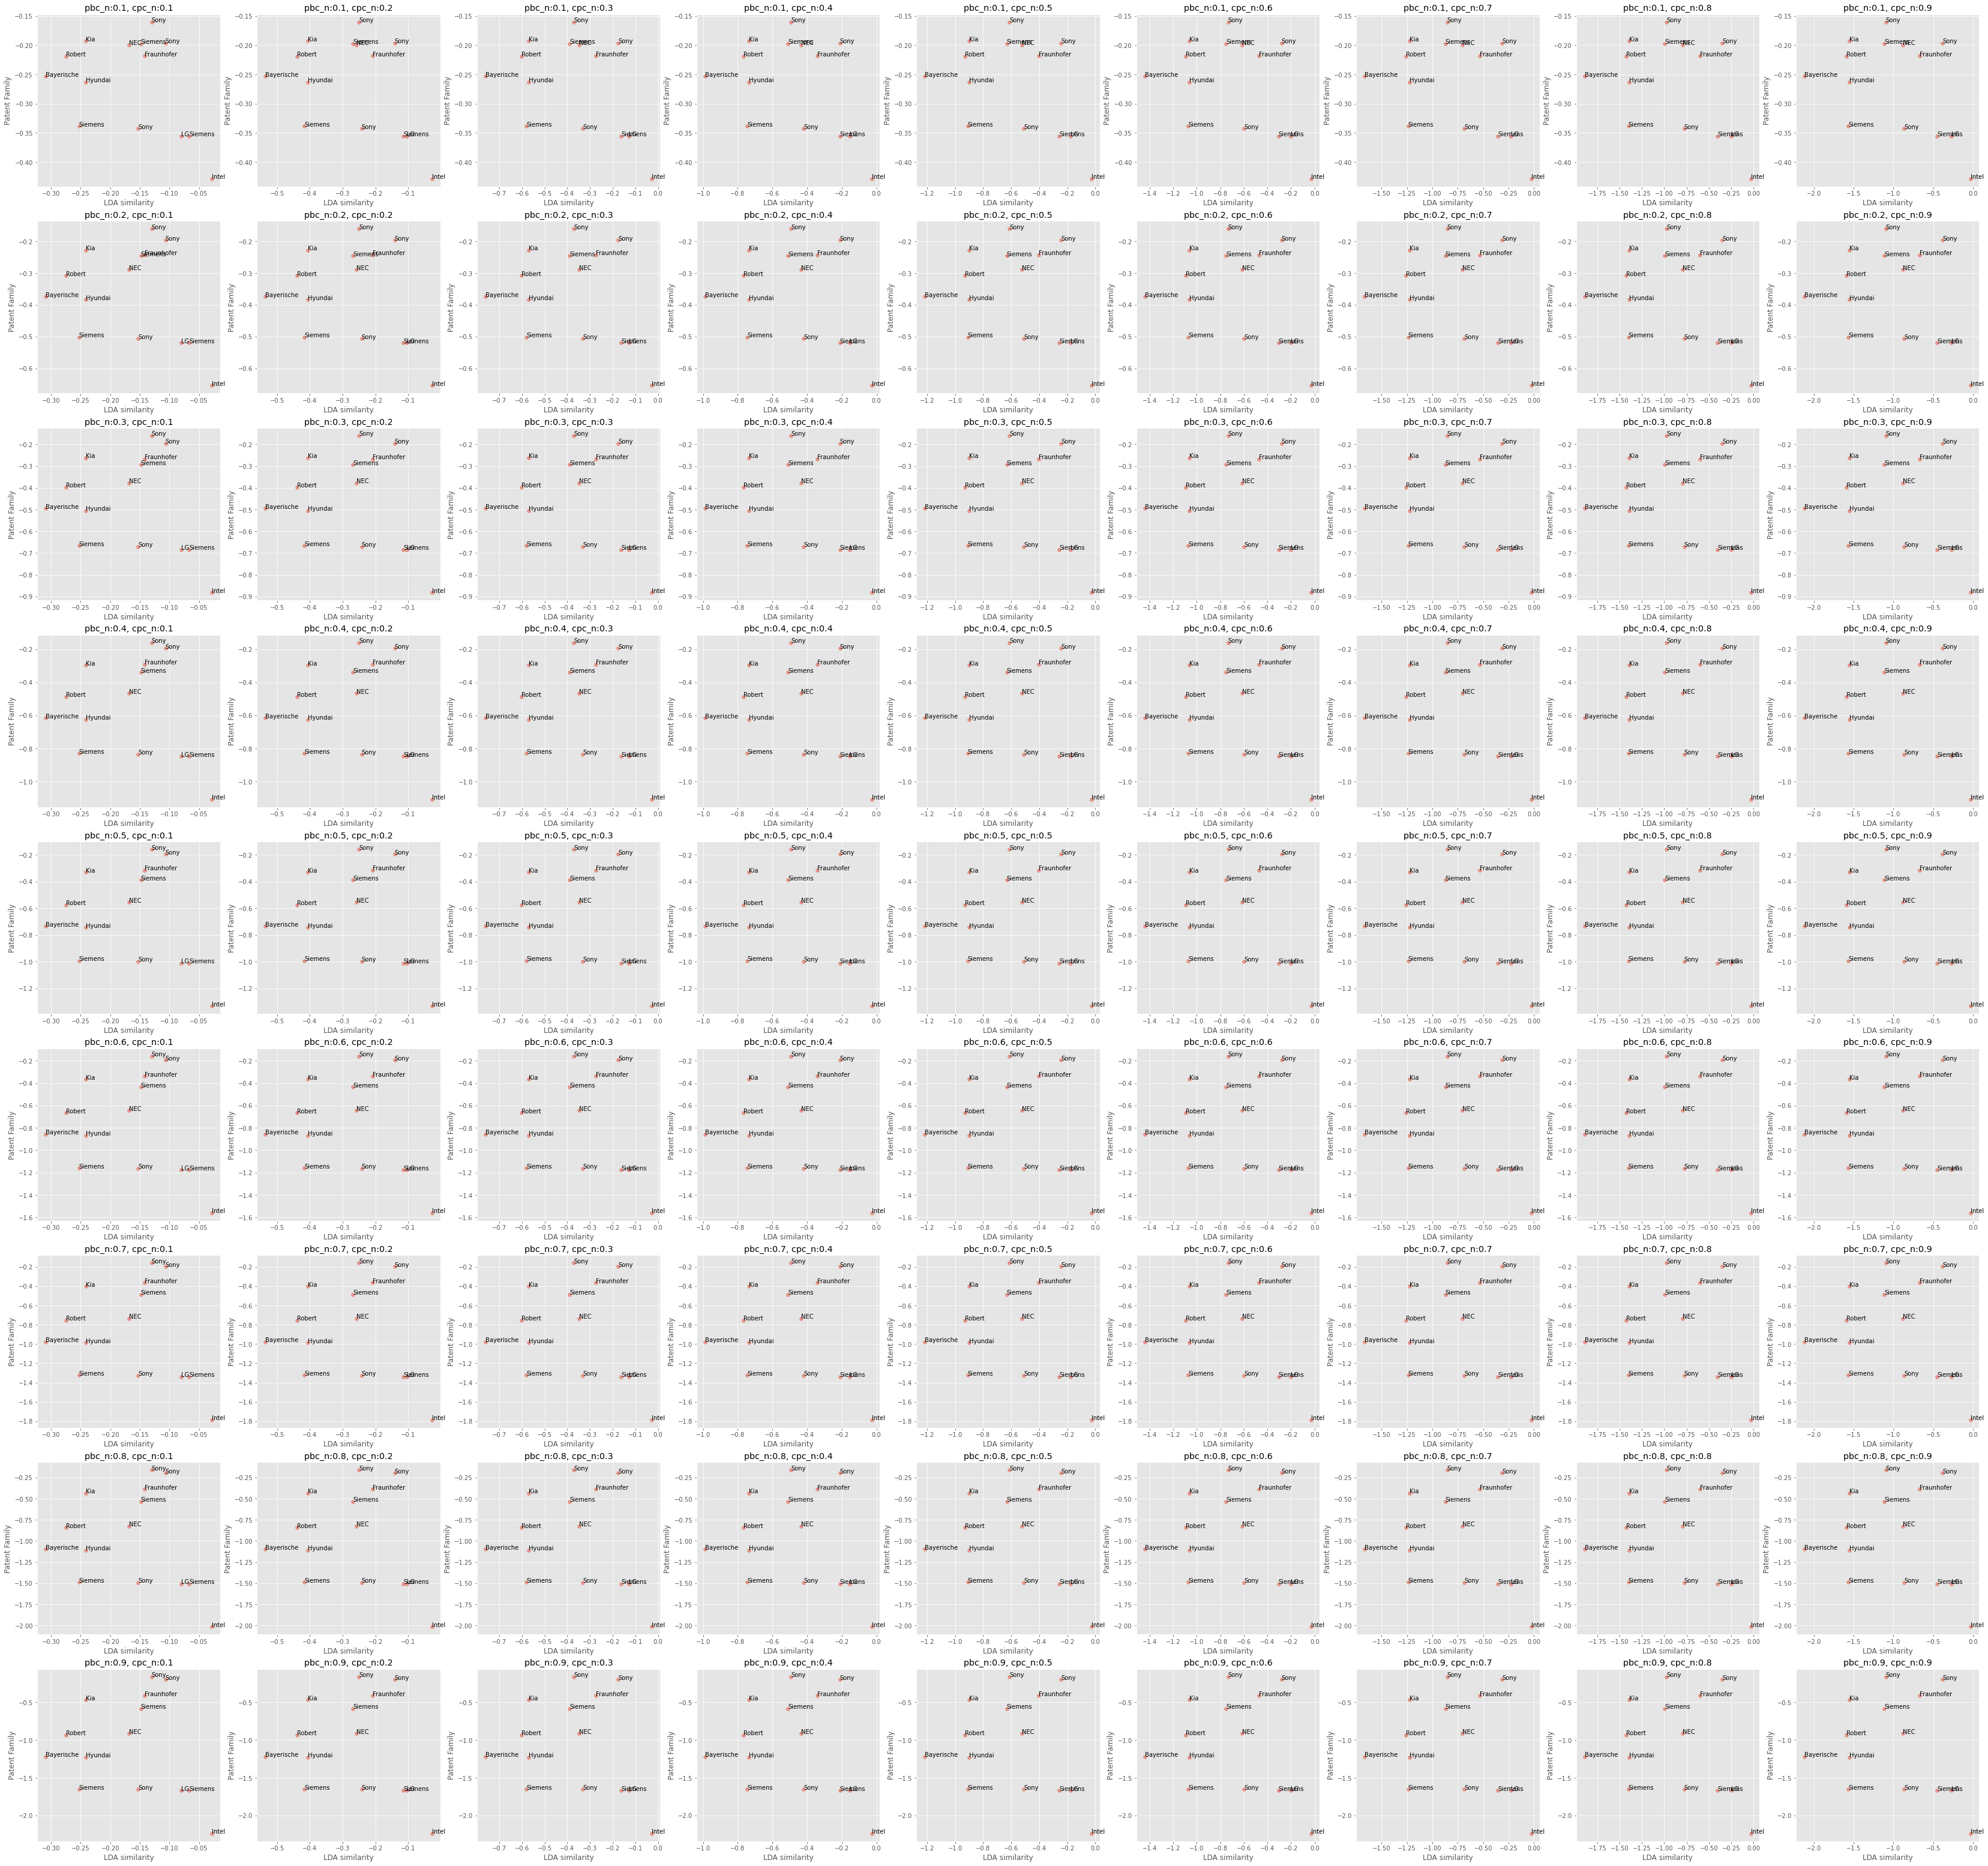

In [20]:
pbc_n_ls=np.arange(0.1,1,0.1)
cpc_n_ls=np.arange(0.1,1,0.1)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("LDA similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_de_brief_2019_1.png'.format(pbc_n))

In [21]:
c_df

,cpc,country
company,,
Intel Corp,0.027778,2.238271
LG Electronics Inc,0.273835,1.668212
Sony Corp,0.383166,0.196032
Siemens AG,0.450926,1.668212
Fraunhofer Gesellschaft zur Forderung der Angewandten Forschung eV,0.668236,0.412287
NEC Corp,0.882172,0.912842
Sony Group Corp,0.866299,1.655239
Sony Semiconductor Solutions Corp,1.095513,0.160207
Siemens Energy Global GmbH and Co KG,1.114032,0.581388


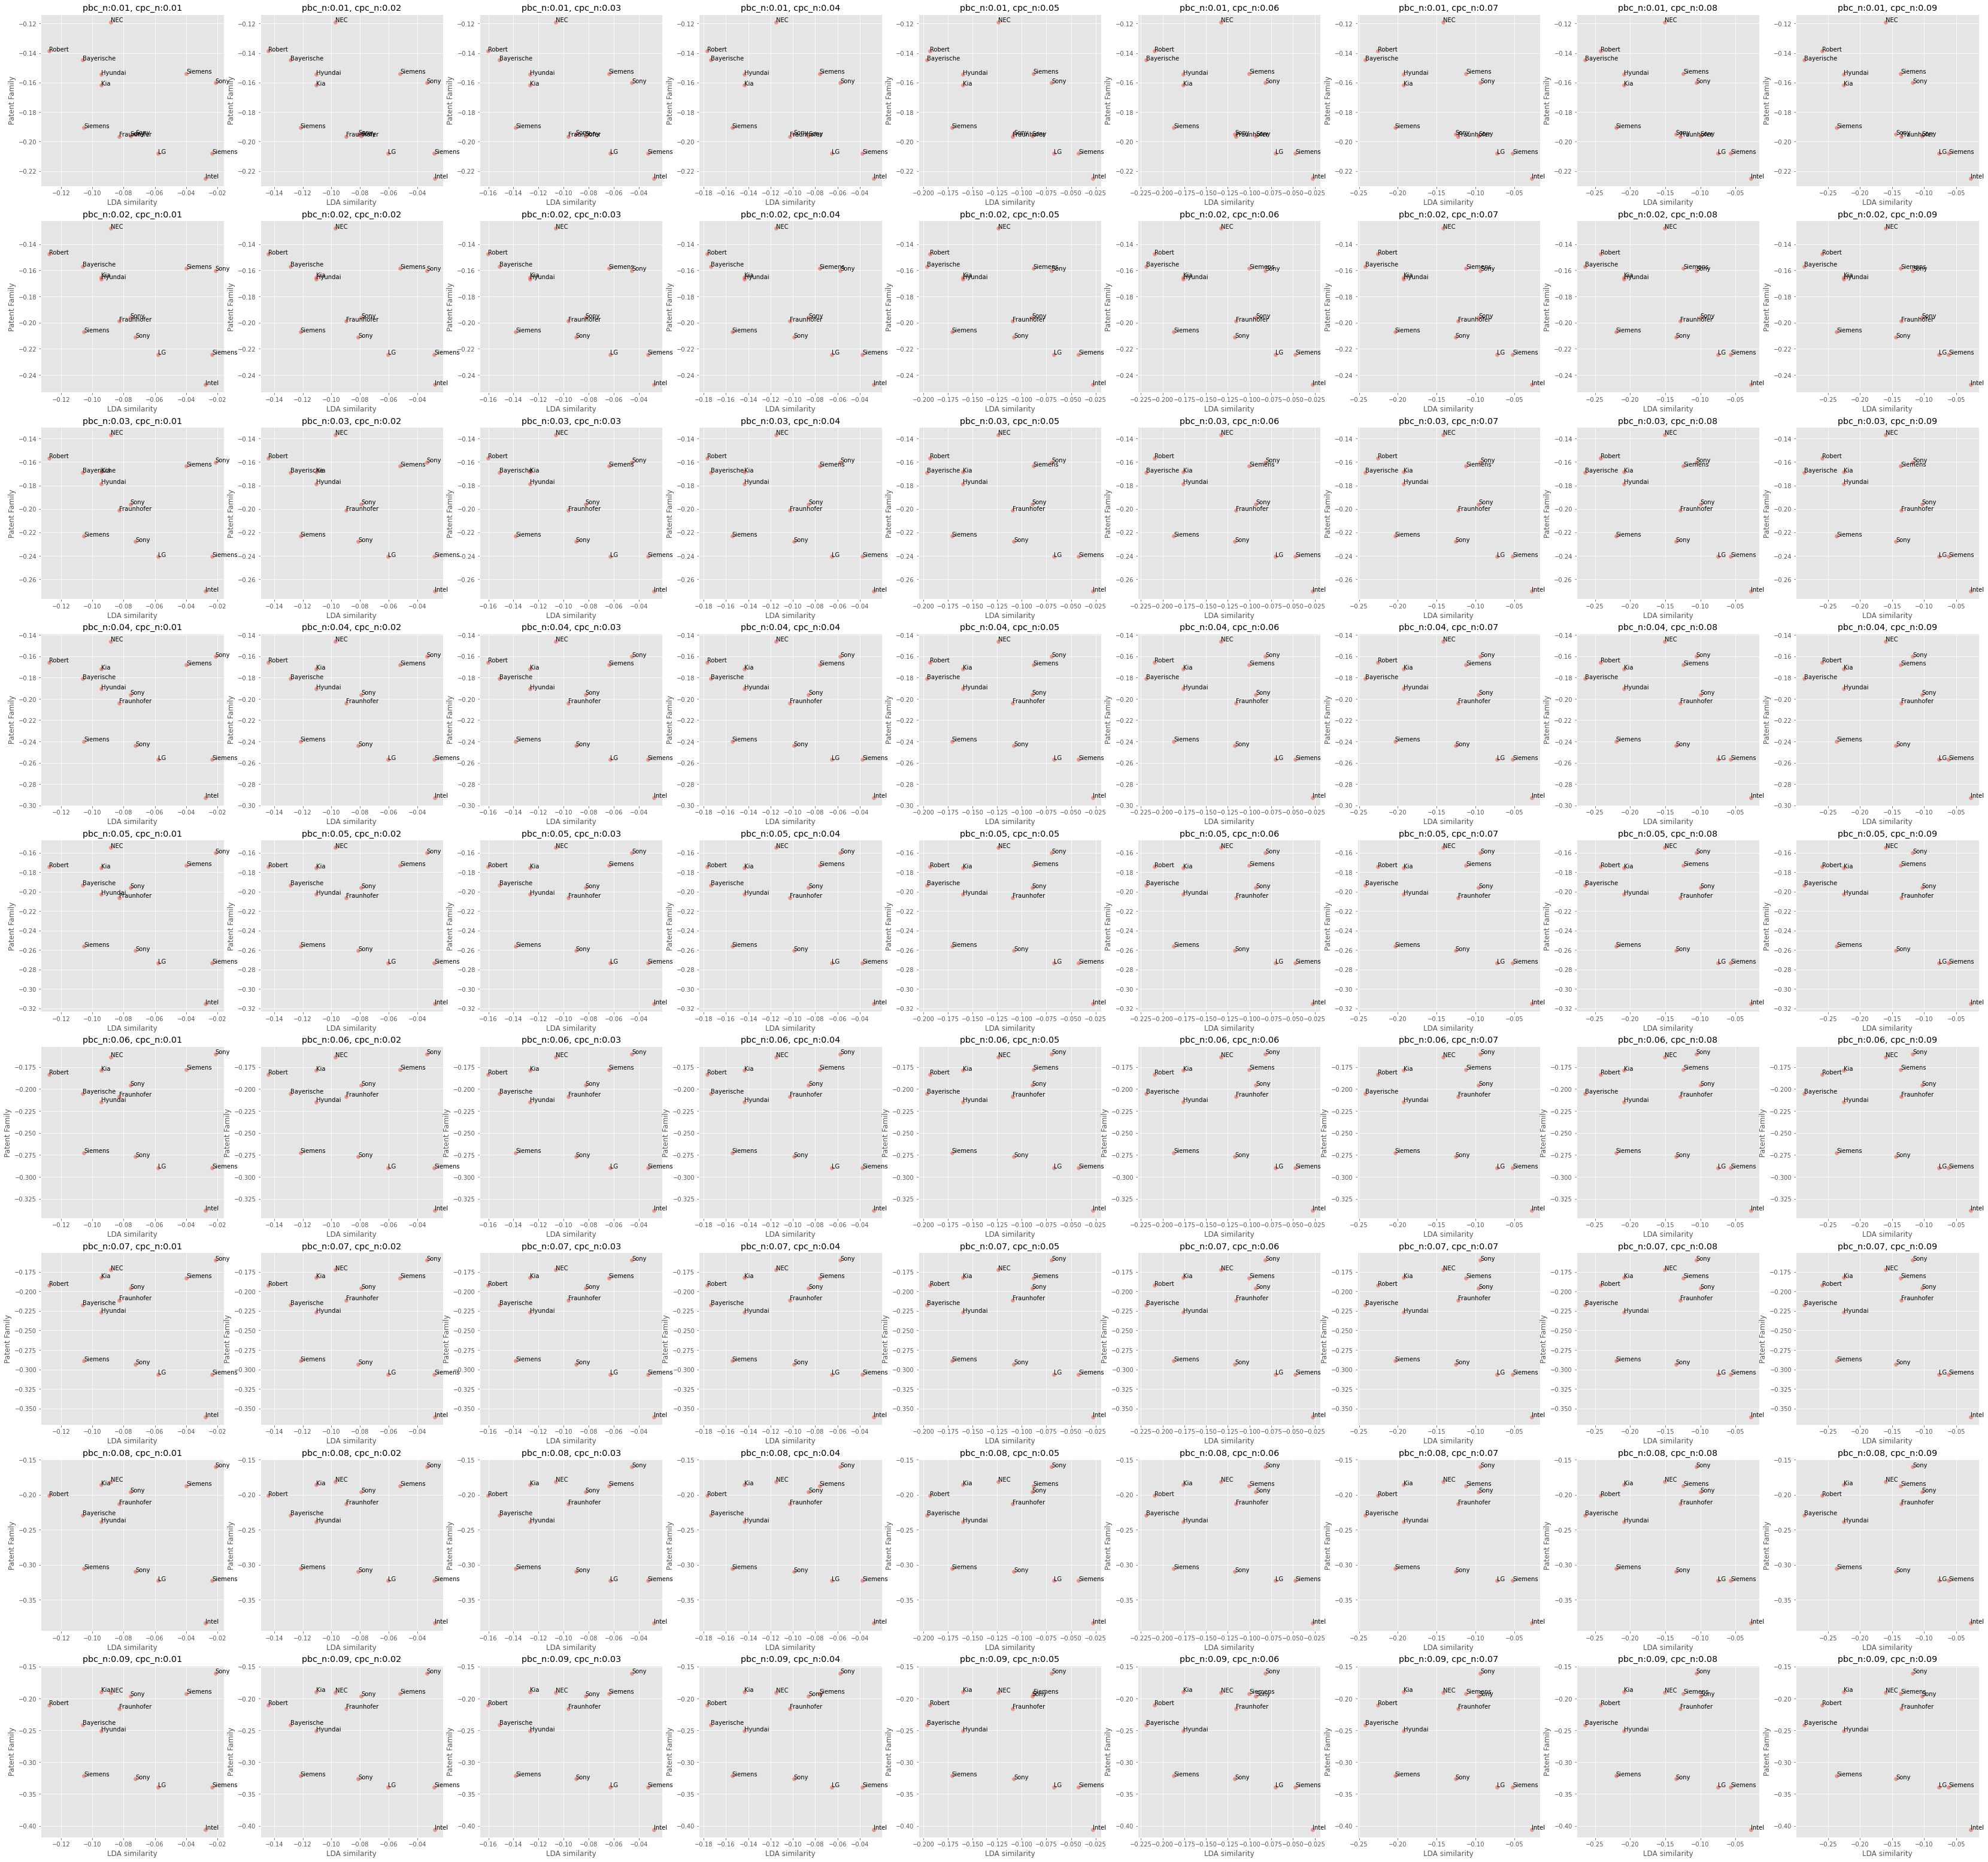

In [22]:
pbc_n_ls=np.arange(0.01,0.1,0.01)
cpc_n_ls=np.arange(0.01,0.1,0.01)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("LDA similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_de_brief_2019_2.png'.format(pbc_n))

In [23]:
c_df

,cpc,country
company,,
Intel Corp,0.027778,0.405850
LG Electronics Inc,0.077384,0.339171
Sony Corp,0.103317,0.196032
Siemens AG,0.061759,0.339171
Fraunhofer Gesellschaft zur Forderung der Angewandten Forschung eV,0.135574,0.215835
NEC Corp,0.159646,0.190316
Sony Group Corp,0.143773,0.326198
Sony Semiconductor Solutions Corp,0.117885,0.160207
Siemens Energy Global GmbH and Co KG,0.136403,0.192221


In [24]:
c_df = scatter_plot(pbc_n,cpc_n)
c_df = c_df.reset_index()
c_df["company"] = c_df.company.apply(lambda x: x.replace(" Inc","")\
                                                    .replace(" Co Ltd","")\
                                                    .replace(" Co. Ltd.","")\
                                                    .replace(" Co., Ltd.","")\
                                                    .replace(" Ltd","")\
                                                    .replace(" Corp","")\
                                                    .replace("..","")\
                                                    .replace("International Business Machines","IBM")\
                                                    .replace("Nippon Telegraph and Telephone","Nippon Telegraph & Tel")\
                                                    .replace("Alibaba Group Holding Ltd","Alibaba")\
                                                    .replace("ZTE Intelligent IoT Technology","ZTE")\
                                                    .replace("AT&T Intellectual Property I LP","AT&T")\
                                                    .replace("Microsoft Technology Licensing LLC","Microsoft")\
                                                    .replace("Telefonaktiebolaget LM Ericsson AB","Ericsson")\
                                                    .replace("Cisco Technology","Cisco Systems")\
                                                    .replace("Verizon Patent and Licensing","Verizon Communications")\
                                                    .replace("Nokia Technologies Oy","Nokia")\
                                                    .replace("China Mobile Communications Group","China Mobile")\
                                                    .replace("Nokia Solutions and Networks Oy","Nokia")\
                                                    .replace("China Mobile","China_Mobile")\
                                                    .replace("China Mobile IoT","China_Mobile_IoT")\
                                                    .replace("China United Network Communications Group","China_Unicom")\
                                                    .replace("Shanghai Langbo Communication Technology","Shanghai_Langbo")\
                                                    .replace("State Grid of China SGCC","SGCC")\
                                                    .replace("Beijing Sankuai Online Technology","Beijing_Sankuai")\
                                                    .replace("Beijing Xiaomi Mobile Software","Xiaomi")\
                                                    .replace("Guangdong Oppo Mobile Telecommunications","Oppo")\
                                                    .replace("Shanghai Roye Electric Science and Technology","Shanghai_Roye_Electric")\
                                                    .replace("Xian Irain IoT Technology Servic","Xian_Irain")\
                                                    .replace("China University of Geosciences","CUG")\
                                                    .replace("Shenzhen Shenglu IoT Communication Technology","Shenglu")\
                                                    .replace("Chengdu Qinchuan IoT Technology","Qinchuan_IoT")\
                                                    .replace("Hangzhou Wopu IoT Technology","Wopu_IoT")\
                                                    .replace("Huaway IoT Technology","Huaway_IoT")\
                                                    .replace("HUIZHOU TECHZEN IOT SCIENCE & TECHNOLOGY","HUIZHOU_TECHZEN_IOT")\
                                                    .replace("Anhui Sharetronic Iot Technology","Anhui_Sharetronic")\
                                                    .replace("Nanjing IoT Sensor Technology","Nanjing_IoT")\
                                                    .replace("SUZHOU XUANHE IOT TECHNOLOGY","SUZHOU_XUANHE_IOT")\
                                                    .replace("Jiangsu IoT Research and Development Center","Jiangsu_IoT")\
                                                    .replace("Shenzhen JBT Smart Lighting","JBT_Smart_Lighting")\
                                                    .replace("Shenzhen Mayixiongbing Iot Technology","Mayixiongbing_IoT")\
                                                    .replace("SHENZHEN QIANHAI LINGJU INTERNET OF THINGS SCIENCE & TECHNOLOGY","QIANHAI_LINGJU")\
                                                    .replace("Shenzhen Qianhai Livall IoT Technology","Livall")\
                                                    .replace("Nanjing Hansense Iot Technology","Hansense_IOT")\
                                                    .replace("GUANGDONG ABEJ IOT INTELLIGENT TECHNOLOGY","ABEJ_IOT")\
                                                    .replace("Tianjin Hui Zhiwulian Science And Technology","THZST")\
                                                    .replace("Chongqing Liuhe Iot","Chongqing_Liuhe_IOT")\
                                                    .replace("Huizhou Sanhe Iot Technology","Huizhou_Sanhe_IOT")\
                                                    .replace("T Mobile USA","T_Mobile_deA")\
                                                    .replace("Taiwan Semiconductor Manufacturing Co TSMC","TSMC")\
                                                    .replace("Suzhou Jiang Zuomen Network Technology","Suzhou_JZ")\
                                                    .replace("Suzhou Jiang Zuomen Network Tech","Suzhou_JZ_net")\
                                                    .replace("Sony Group","Sony_Group")\
                                                    .replace("Sony Semiconductor Solutions","Sony_Semiconductor")\
                                                    .replace("Siemens Energy Global GmbH and Co KG","Siemens_Energy")\
                                                    .replace("Siemens Mobility GmbH","Siemens_Mobility")\
                                                    .replace("Bayerische Motoren Werke AG","BMW"))
c_df.set_index("company", inplace=True)
c_df = c_df.drop("Samsung Electronics")

In [25]:
c_df

,cpc,country
company,,
Intel,0.027778,0.405850
LG Electronics,0.077384,0.339171
Sony,0.103317,0.196032
Siemens AG,0.061759,0.339171
Fraunhofer Gesellschaft zur Forderung der Angewandten Forschung eV,0.135574,0.215835
NEC,0.159646,0.190316
Sony_Group,0.143773,0.326198
Sony_Semiconductor,0.117885,0.160207
Siemens_Energy,0.136403,0.192221


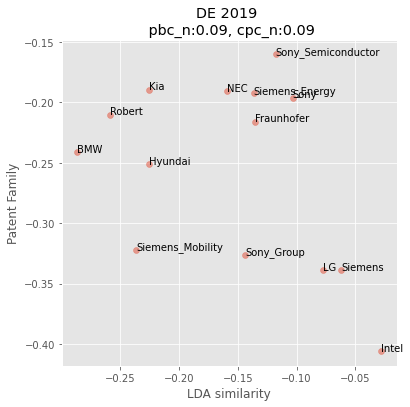

In [26]:
pbc_n=0.09
cpc_n=0.09
# c_df = scatter_plot(pbc_n,cpc_n)
# c_df = c_df.drop("Samsung Electronics Co Ltd")

plt.figure(figsize=(6,6))
plt.style.use('ggplot')
#plot
# plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
plt.title("DE 2019 \n pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
plt.xlabel("LDA similarity")
plt.ylabel("Patent Family")

for i, txt in enumerate(c_df.index):
    plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

In [27]:
m_x = (-max(c_df.cpc)-min(c_df.cpc))/2
m_y = (-max(c_df.country)-min(c_df.country))/2

competitor_ls = []

for i,cpc,con in zip(c_df.index,c_df["cpc"],c_df["country"]):
    if -cpc>m_x and -con>m_y:
        competitor_ls.append(1)
    elif -cpc<m_x and -con>m_y:
        competitor_ls.append(2)
    elif -cpc>m_x and -con<m_y:
        competitor_ls.append(3)
    else:
        competitor_ls.append(4)

In [28]:
competitor_ls

[3, 3, 1, 3, 1, 2, 3, 1, 1, 2, 4, 2, 2, 2]

In [29]:
c_df

,cpc,country
company,,
Intel,0.027778,0.405850
LG Electronics,0.077384,0.339171
Sony,0.103317,0.196032
Siemens AG,0.061759,0.339171
Fraunhofer Gesellschaft zur Forderung der Angewandten Forschung eV,0.135574,0.215835
NEC,0.159646,0.190316
Sony_Group,0.143773,0.326198
Sony_Semiconductor,0.117885,0.160207
Siemens_Energy,0.136403,0.192221


In [30]:
c_df.to_csv("competitor_df/company/lda_de_2019.csv")